In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

In [16]:
def f(r,M,rc,rho00):
    return np.sqrt(nf.bh_v(r,M)**2 + nf.h_v(r,rc,rho00)**2)
#Next: Spline bulge, make that a function, give prefactor
# - call file, get vector
# - spline fit vector
# - calculate over spline
# - prefactor in sum
#Probably similar thing for disk
#Eventually fit for n?

#Cache/memoize
# - number of iterations -> number of function calls
# - 40 calls was reasonable

p0 = [nf.Mbh_def,nf.h_rc,nf.h_rho00]

In [20]:
s_fit = opt.curve_fit(f,r_dat,v_dat,p0,sigma=v_err1,absolute_sigma=True)

s_M = s_fit[0][0]
s_rc = s_fit[0][1]
s_rho00 = s_fit[0][2]

s_cov = s_fit[1]
s_error = np.sqrt(np.diag(s_cov))
s_Me = s_error[0]
s_rce = s_error[1]
s_rho00e = s_error[1]

s_curve = np.sqrt(nf.bh_v(r_dat,s_M)**2 + nf.h_v(r_dat,s_rc,s_rho00)**2)

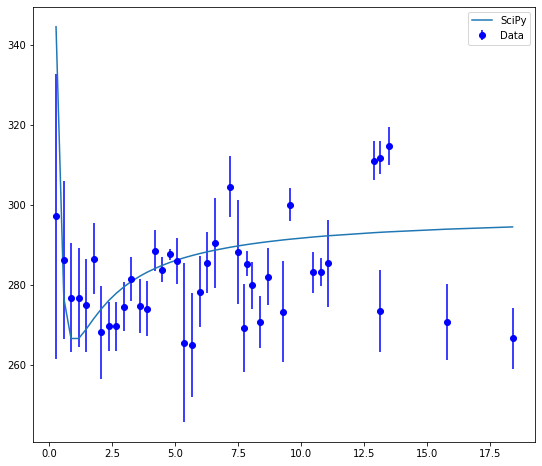

In [21]:
fig = plt.figure(figsize=(9.0,8.0))

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,s_curve,label='SciPy')

plt.legend()
plt.show()

In [19]:
#Print Values
print('M: '+str(s_M)+u' \u00B1 '+str(s_Me))
print('rc: '+str(s_rc)+u' \u00B1 '+str(s_rce))
print('rho00: '+str(s_rho00)+u' \u00B1 '+str(s_rho00e))

M: 1846445.9082220243 ± 12790614.439409716
rc: -205179.18441723337 ± 435.442865191701
rho00: 1076734.7439504177 ± 435.442865191701


In [10]:
nf.b_vsquarev(r_dat[0],n=1)

array(66155.54450447)